In [4]:
!apt-get install libeccodes-tools
!pip install cartopy
!pip install satpy
!apt-get install gdal-bin

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libeccodes-tools is already the newest version (2.24.2-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  python3-gdal python3-numpy
Suggested packages:
  libgdal-grass python-numpy-doc python3-pytest
The following NEW packages will be installed:
  gdal-bin python3-gdal python3-numpy
0 upgraded, 3 newly installed, 0 to remove and 35 not upgraded.
Need to get 5,055 kB of archives.
After this operation, 25.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 python3-numpy amd64 1:1.21.5-1ubuntu22.04.1 [3,467 kB]
Get:2 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy/main amd64 python3-gdal amd64 3.6.4+dfsg-1~jammy0 [1,027 kB]
Get:3 https://ppa.launchpadcontent.n

In [6]:
!add-apt-repository ppa:ubuntugis/ppa && sudo apt-get update
!apt-get update
!apt-get install gdal-bin
!apt-get install libgdal-dev
!export CPLUS_INCLUDE_PATH=/usr/include/gdal
!export C_INCLUDE_PATH=/usr/include/gdal
!pip install GDAL

PPA publishes dbgsym, you may need to include 'main/debug' component
Repository: 'deb https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu/ jammy main'
Description:
Official stable UbuntuGIS packages.


More info: https://launchpad.net/~ubuntugis/+archive/ubuntu/ppa
Adding repository.
Press [ENTER] to continue or Ctrl-c to cancel.Aborted.
Hit:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:6 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ Packages [50.4 kB]
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:9 https://ppa.launchpadcontent.net/deadsnake

In [ ]:
import numpy as np

def rescale(data, in_min, in_max, out_min, out_max):
    return (data - in_min) * (out_max - out_min) / (in_max - in_min) + out_min

def generate_dust_rgb(scn):
    ir120 = scn["IR_120"].data
    ir108 = scn["IR_108"].data
    ir087 = scn["IR_087"].data

    r = rescale(ir120 - ir108, -4, 2, 0, 255)
    g = (np.power(rescale(ir108 - ir087, 0, 15, 0, 1), 1/2.5)) * 255
    b = rescale(ir108, 261, 289, 0, 255)
    
    return r, g, b

def generate_dust_rgb_product(data_dir, latBound, lngBound):
    # Define the channels needed for RGB computation
    channels = ["IR_120", "IR_108", "IR_087"]

    # List all files in the directory
    files = os.listdir(data_dir)
    fnames = [os.path.join(data_dir, f) for f in files]

    # Create a Scene object
    scn = Scene(reader='seviri_l1b_hrit', filenames=fnames)

    scn.load(channels)

    # Compute RGB values
    r, g, b = generate_dust_rgb(scn)
    # Combine RGB channels
    rgb_image = np.dstack((r, g, b))
    proj = scn["IR_120"].attrs['area'].to_cartopy_crs()
    transformProj = ccrs.Mercator()

    # Create a plot with Cartopy
    plt.figure(figsize=(10, 8))

    # Define the projection and extent
    ax = plt.axes(projection=ccrs.Mercator())
    ax.set_extent([lngBound[0], lngBound[1], latBound[0], latBound[1]], crs=ccrs.PlateCarree())

    # Plot the RGB image
    plt.imshow(rgb_image, extent=proj.bounds, transform=proj, origin='upper')

    # Add map features
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.5)
    ax.add_feature(cfeature.BORDERS.with_scale('50m'), linewidth=0.5)

    # Add title
    plt.title("Dust RGB Product")

    plt.show()

# Replace with your actual directory and filename pattern (assuming no extensions)
data_dir = "drive/MyDrive/RAW_HRIT/14-00"

latBound = [7.22, 37.454]
lngBound = [43.753, 102.363]

# Generate dust RGB product
generate_dust_rgb_product(data_dir, latBound, lngBound)


In [ ]:
# Clone the repository with submodules
!git clone --recurse-submodules https://github.com/ARPA-SIMC/meteosatlib.git

# Navigate to the Meteosatlib directory
%cd meteosatlib

# Run autotools commands
!autoreconf -ifv
!./configure
!make
!make check  # optional
!make install


In [ ]:
!pip install meteostat

In [ ]:
!unzip 'drive/MyDrive/RAW_HRIT/HRIT' -d 'drive/MyDrive/RAW_HRIT'

In [1]:
!msat --png --Area="37,49,5,20" 'drive/MyDrive/RAW_HRIT/13-00/H-000-MSG2__-MSG2_IODC___'

/bin/bash: line 1: msat: command not found


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# https://satpy.readthedocs.io/en/latest/_modules/satpy/readers/seviri_base.html
# https://github.com/ARPA-SIMC/meteosatlib/blob/master/examples/products
# https://www-cdn.eumetsat.int/files/2020-04/pdf_conf_p_s5_01_celano_v.pdf

/usr/local/lib/python3.10/dist-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


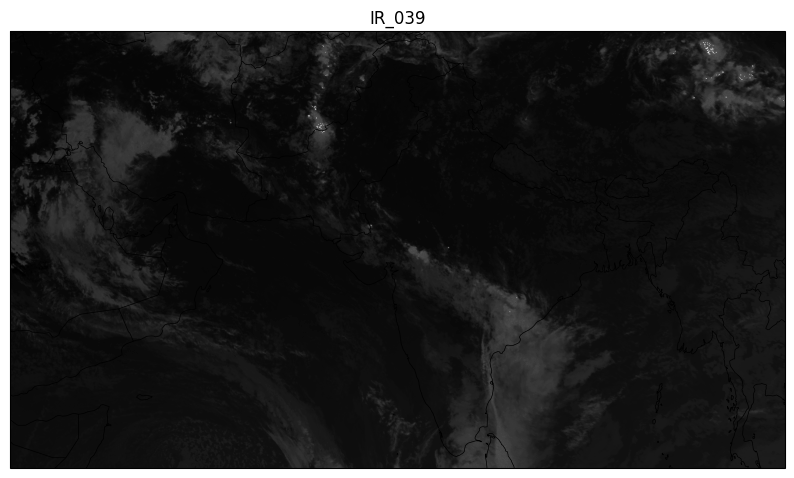

In [5]:
# Original
import cartopy.crs as ccrs
import cartopy.feature as cfeature

import satpy
from satpy.scene import Scene
import matplotlib.pyplot as plt
import os

CHANNEL_NAMES = {1: "VIS006",
                 2: "VIS008",
                 3: "IR_016",
                 4: "IR_039",
                 5: "WV_062",
                 6: "WV_073",
                 7: "IR_087",
                 8: "IR_097",
                 9: "IR_108",
                 10: "IR_120",
                 11: "IR_134",
                 12: "HRV"}

VIS_CHANNELS = ["HRV", "VIS006", "VIS008", "IR_016"]
latBound = [7.22, 37.454]
lngBound = [43.753, 102.363]
channel = CHANNEL_NAMES[4]  # Choose your desired channel

# Replace with your actual directory and filename pattern (assuming no extensions)
data_dir = "drive/MyDrive/RAW_HRIT/14-00"

# List all files in the directory
files = os.listdir(data_dir)
fnames = [os.path.join(data_dir, f) for f in files]

# Create a Scene object
scn1 = Scene(reader='seviri_l1b_hrit', filenames=fnames)

scn1.load([channel])

# Access product data (modify channel if needed)
product = scn1[channel]
data = product.data

# Retrieve the projection of the satellite data
proj = product.attrs['area'].to_cartopy_crs()
transformProj = ccrs.Mercator()
# Create a plot with Cartopy
plt.figure(figsize=(10, 8))

# Define the projection and extent
ax = plt.axes(projection=transformProj)
ax.set_extent([lngBound[0], lngBound[1], latBound[0], latBound[1]], crs=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.5)
ax.add_feature(cfeature.BORDERS.with_scale('50m'), linewidth=0.5)

# Plot the data
plt.imshow(data, extent=proj.bounds, transform=proj, cmap='gray_r')

# Add colorbar
# plt.colorbar(label='Brightness Temperature (K)')

# Add title
plt.title(channel)

plt.show()


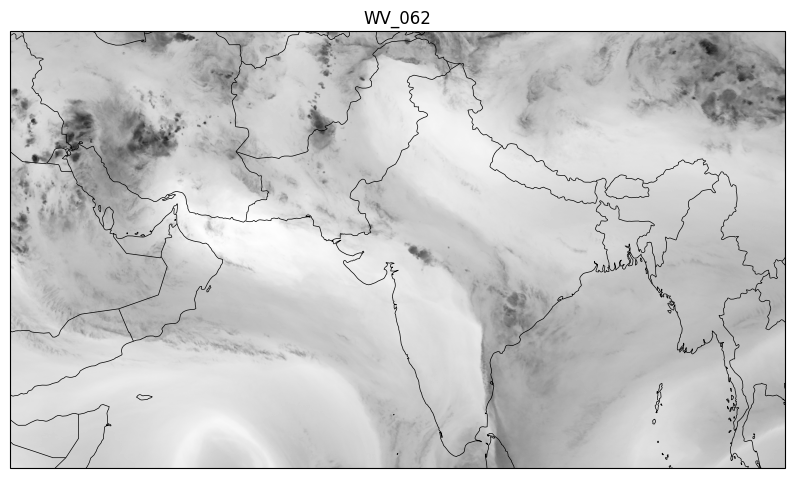

In [14]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import satpy
from satpy.scene import Scene
import matplotlib.pyplot as plt
import os

CHANNEL_NAMES = {
    1: "VIS006",
    2: "VIS008",
    3: "IR_016",
    4: "IR_039",
    5: "WV_062",
    6: "WV_073",
    7: "IR_087",
    8: "IR_097",
    9: "IR_108",
    10: "IR_120",
    11: "IR_134",
    12: "HRV"
}

VIS_CHANNELS = ["HRV", "VIS006", "VIS008", "IR_016"]
latBound = [7.22, 37.454]
lngBound = [43.753, 102.363]
channel = CHANNEL_NAMES[5]  # Choose your desired channel

# Replace with your actual directory and filename pattern (assuming no extensions)
data_dir = "drive/MyDrive/RAW_HRIT/14-00"

# List all files in the directory
files = os.listdir(data_dir)
fnames = [os.path.join(data_dir, f) for f in files]

# Create a Scene object
scn1 = Scene(reader='seviri_l1b_hrit', filenames=fnames)

scn1.load([channel])

# Access product data (modify channel if needed)
product = scn1[channel]
data = product.data

# Previous calibration parameters
CALIB = {
    "HRV": {"F": 79.0113},
    "VIS006": {"F": 65.2065},
    "VIS008": {"F": 73.1869},
    "IR_016": {"F": 61.9923},
    "IR_039": {"VC": 2568.832, "ALPHA": 0.9954, "BETA": 3.438},
    "WV_062": {"VC": 1600.548, "ALPHA": 0.9963, "BETA": 2.185},
    "WV_073": {"VC": 1360.330, "ALPHA": 0.9991, "BETA": 0.47},
    "IR_087": {"VC": 1148.620, "ALPHA": 0.9996, "BETA": 0.179},
    "IR_097": {"VC": 1035.289, "ALPHA": 0.9999, "BETA": 0.056},
    "IR_108": {"VC": 931.7, "ALPHA": 0.9983, "BETA": 0.64},
    "IR_120": {"VC": 836.445, "ALPHA": 0.9988, "BETA": 0.408},
    "IR_134": {"VC": 751.792, "ALPHA": 0.9981, "BETA": 0.561}
}

# Additional calibration coefficients
MEIRINK_COEFS = {
    "VIS006": (21.026, 0.2556),
    "VIS008": (26.875, 0.1835),
    "IR_016": (21.394, 0.0498)
}

# Apply calibration if available
calibration_params = CALIB.get(channel, {})
meirink_coefs = MEIRINK_COEFS.get(channel, ())
if calibration_params:
    if "F" in calibration_params:
        data = data * calibration_params["F"]
    elif all(key in calibration_params for key in ("VC", "ALPHA", "BETA")):
        data = calibration_params["VC"] / (calibration_params["ALPHA"] * (data - calibration_params["BETA"]))

# Apply additional calibration coefficients if available
if meirink_coefs:
    alpha, beta = meirink_coefs
    if isinstance(alpha, float) and isinstance(beta, float):
        data = alpha * data + beta

# Retrieve the projection of the satellite data
proj = product.attrs['area'].to_cartopy_crs()
transformProj = ccrs.Mercator()
# Create a plot with Cartopy
plt.figure(figsize=(10, 8))

# Define the projection and extent
ax = plt.axes(projection=transformProj)
ax.set_extent([lngBound[0], lngBound[1], latBound[0], latBound[1]], crs=ccrs.PlateCarree())

# Add map features
ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.5)
ax.add_feature(cfeature.BORDERS.with_scale('50m'), linewidth=0.5)

# Plot the data
plt.imshow(data, extent=proj.bounds, transform=proj, cmap='gray_r')

# Add colorbar
# plt.colorbar(label='Brightness Temperature (K)')

# Add title
plt.title(channel)

plt.show()


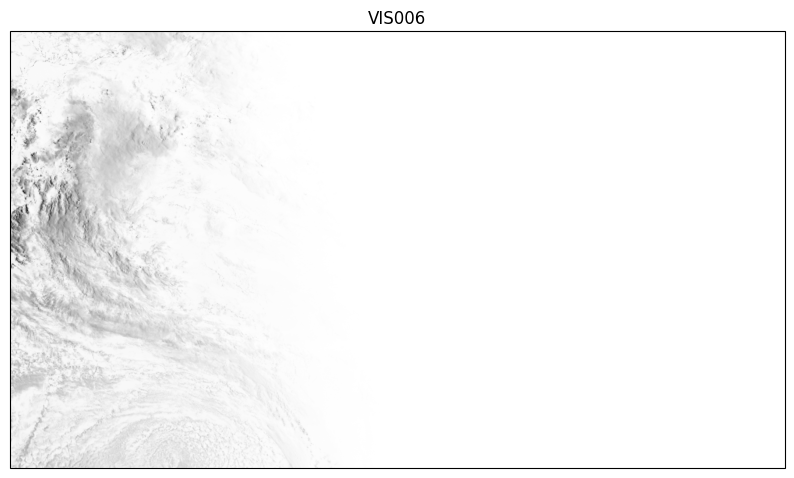

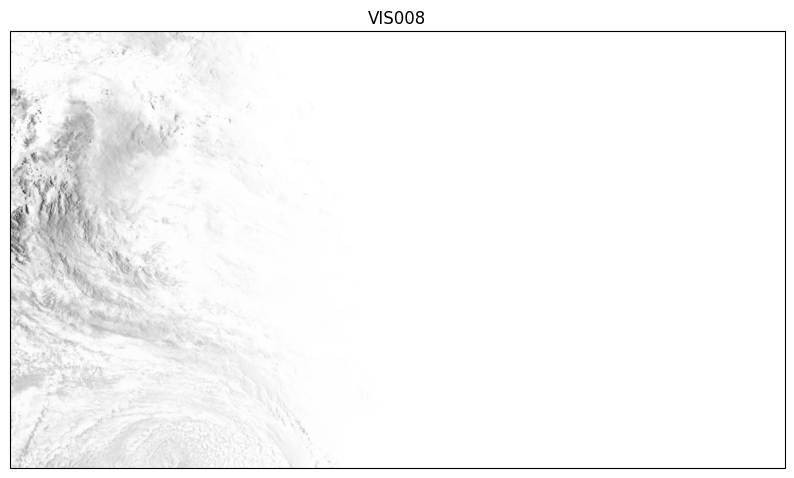

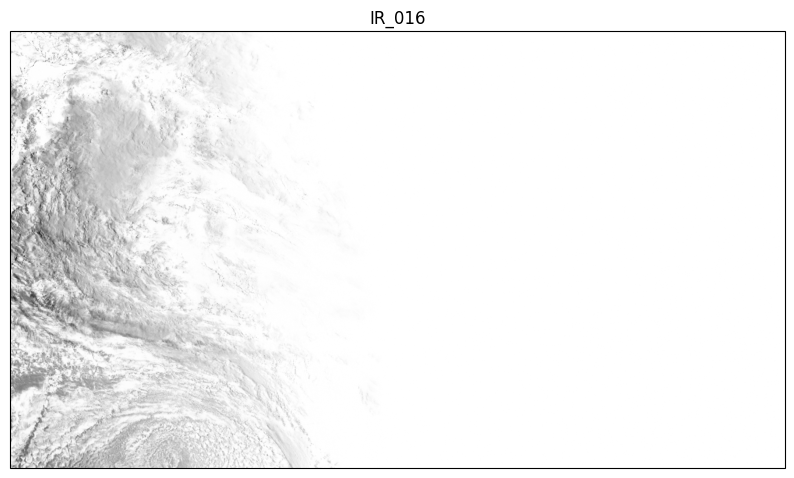

/usr/local/lib/python3.10/dist-packages/dask/core.py:121: RuntimeWarning: divide by zero encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


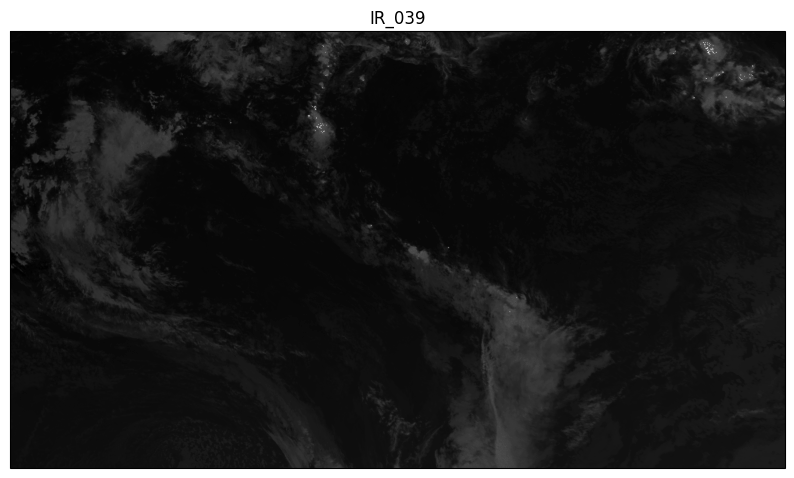

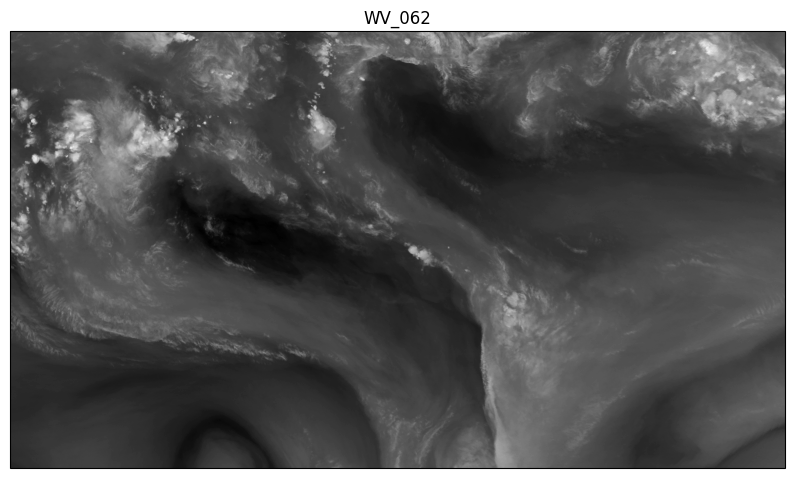

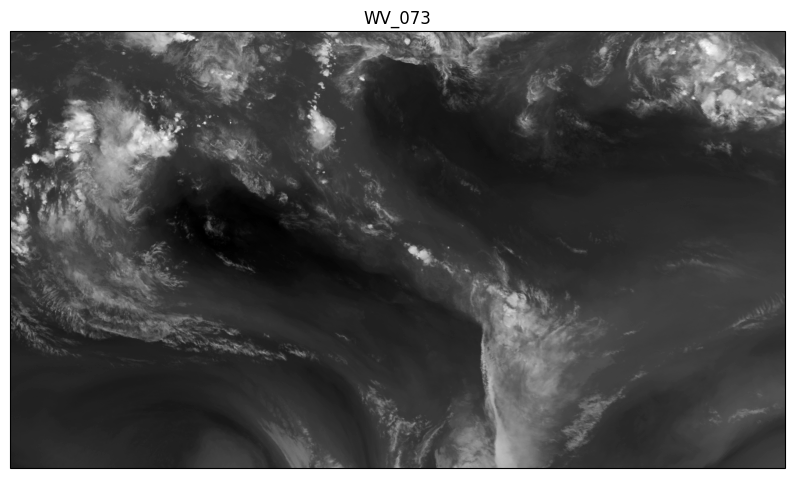

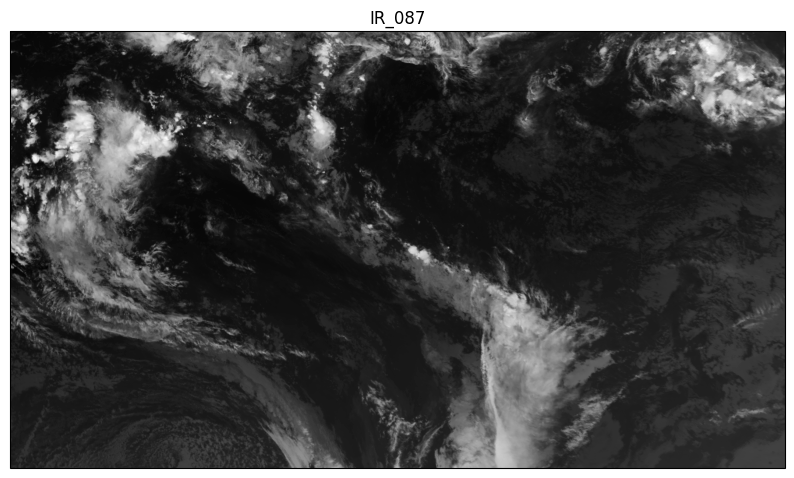

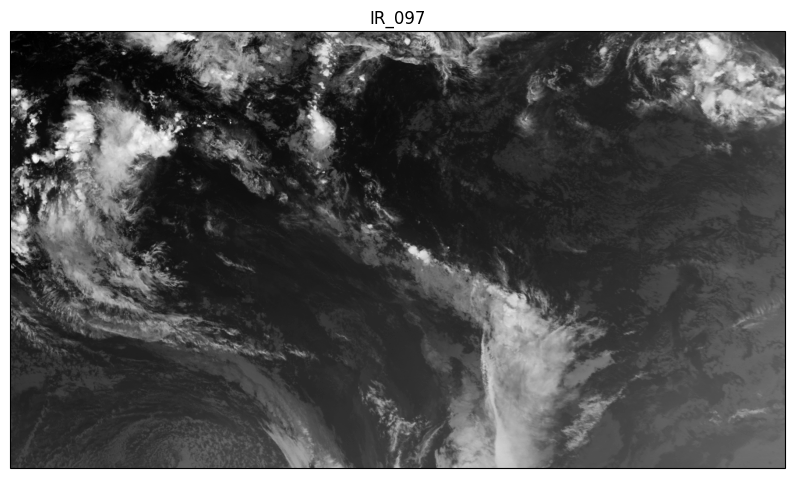

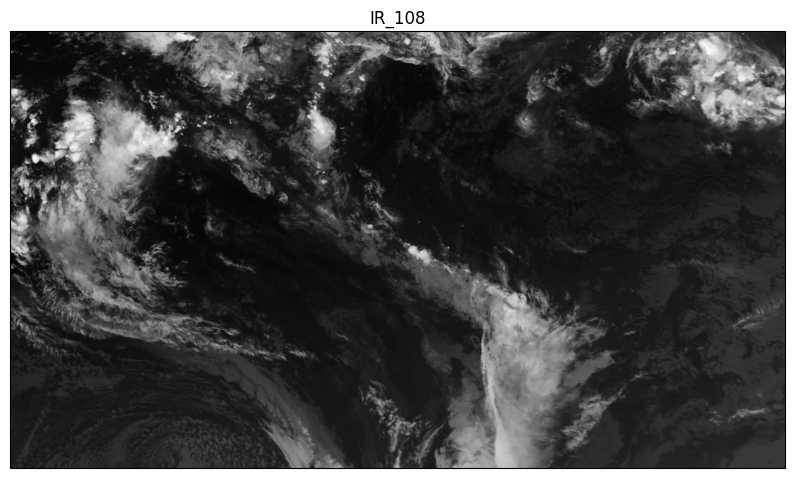

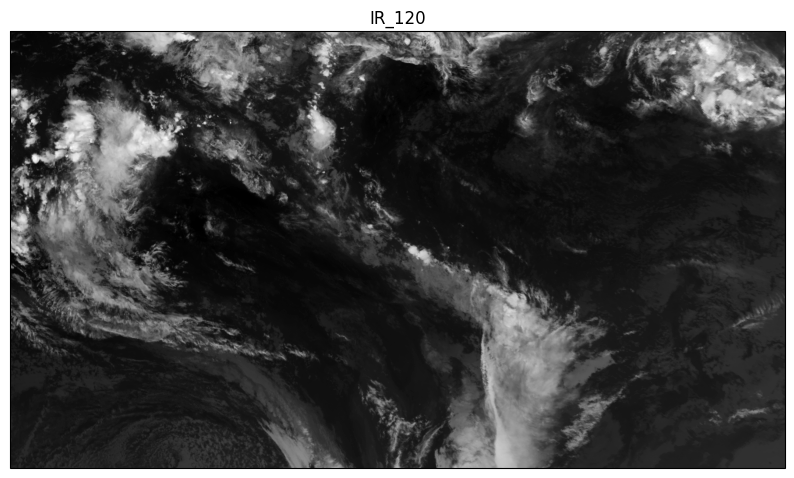

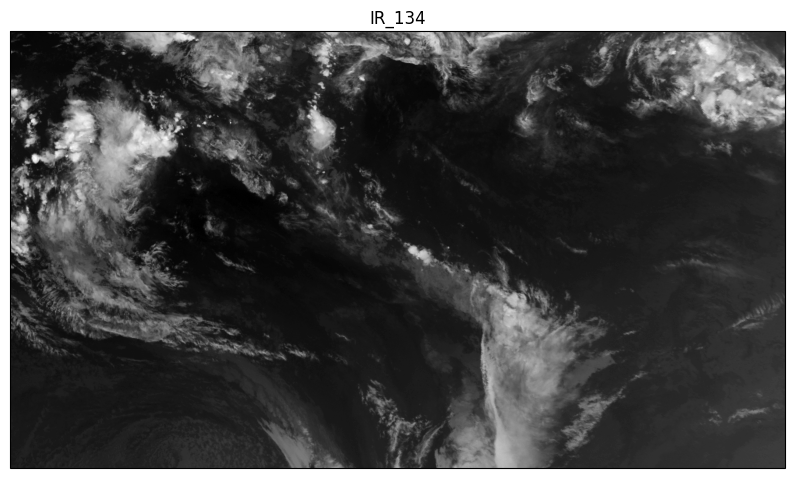

/usr/local/lib/python3.10/dist-packages/pyresample/geometry.py:1582: RuntimeWarning: invalid value encountered in scalar divide
  self.pixel_size_y = (area_extent[3] - area_extent[1]) / float(height)
/usr/local/lib/python3.10/dist-packages/pyresample/geometry.py:1582: RuntimeWarning: invalid value encountered in scalar divide
  self.pixel_size_y = (area_extent[3] - area_extent[1]) / float(height)
/usr/local/lib/python3.10/dist-packages/pyresample/geometry.py:1582: RuntimeWarning: invalid value encountered in scalar divide
  self.pixel_size_y = (area_extent[3] - area_extent[1]) / float(height)
/usr/local/lib/python3.10/dist-packages/pyresample/geometry.py:1582: RuntimeWarning: invalid value encountered in scalar divide
  self.pixel_size_y = (area_extent[3] - area_extent[1]) / float(height)
/usr/local/lib/python3.10/dist-packages/pyresample/geometry.py:1582: RuntimeWarning: invalid value encountered in scalar divide
  self.pixel_size_y = (area_extent[3] - area_extent[1]) / float(height)


In [ ]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import satpy
from satpy.scene import Scene
import matplotlib.pyplot as plt
import os

CHANNEL_NAMES = {1: "VIS006",
                 2: "VIS008",
                 3: "IR_016",
                 4: "IR_039",
                 5: "WV_062",
                 6: "WV_073",
                 7: "IR_087",
                 8: "IR_097",
                 9: "IR_108",
                 10: "IR_120",
                 11: "IR_134",
                 12: "HRV"}

def generate_product(data_dir, channel, latBound, lngBound):
    # List all files in the directory
    files = os.listdir(data_dir)
    fnames = [os.path.join(data_dir, f) for f in files]

    # Create a Scene object
    scn = Scene(reader='seviri_l1b_hrit', filenames=fnames)

    scn.load([channel])

    # Access product data (modify channel if needed)
    product = scn[channel]
    data = product.data

    # Retrieve the projection of the satellite data
    proj = product.attrs['area'].to_cartopy_crs()
    transformProj = ccrs.Mercator()

    # Create a plot with Cartopy
    plt.figure(figsize=(10, 8))

    # Define the projection and extent
    ax = plt.axes(projection=transformProj)
    ax.set_extent([lngBound[0], lngBound[1], latBound[0], latBound[1]], crs=ccrs.PlateCarree())

    # Add map features
    # ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.5)
    # ax.add_feature(cfeature.BORDERS.with_scale('50m'), linewidth=0.5)

    # Plot the data
    plt.imshow(data, extent=proj.bounds, transform=proj, cmap='gray_r')

    # Add title
    plt.title(channel)

    plt.show()

# Replace with your actual directory and filename pattern (assuming no extensions)
data_dir = "drive/MyDrive/RAW_HRIT/14-00"

latBound = [7.22, 37.454]
lngBound = [43.753, 102.363]

# Generate each product
for channel_name in CHANNEL_NAMES.values():
    generate_product(data_dir, channel_name, latBound, lngBound)


/usr/local/lib/python3.10/dist-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in power
  return func(*(_execute_task(a, cache) for a in args))
/usr/local/lib/python3.10/dist-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


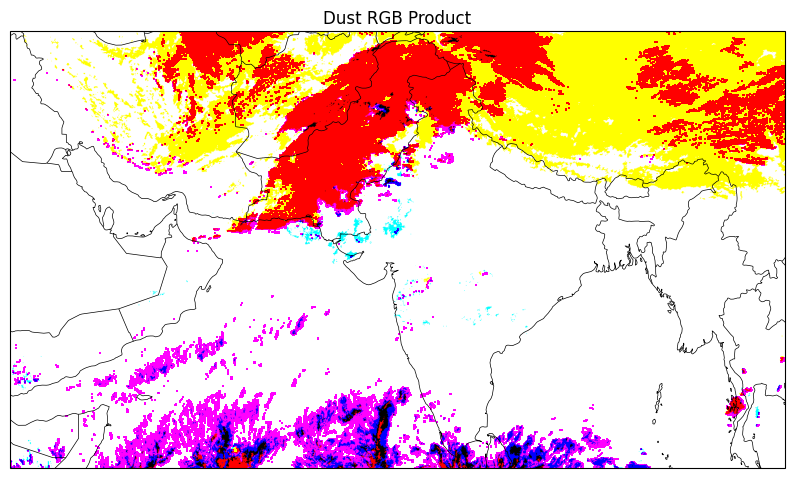

In [49]:
import numpy as np

def rescale(data, in_min, in_max, out_min, out_max):
    return (data - in_min) * (out_max - out_min) / (in_max - in_min) + out_min

def generate_dust_rgb_product(data_dir, latBound, lngBound):
    # Define the channels needed for RGB computation
    channels = ["IR_120", "IR_108", "IR_087"]

    # List all files in the directory
    files = os.listdir(data_dir)
    fnames = [os.path.join(data_dir, f) for f in files]

    # Create a Scene object
    scn = Scene(reader='seviri_l1b_hrit', filenames=fnames)

    scn.load(channels)

    # Access product data
    ir120 = scn["IR_120"].data
    ir108 = scn["IR_108"].data
    ir087 = scn["IR_087"].data

    # Compute RGB values
    r = rescale(ir120 - ir108, -4, 2, 0, 255)
    g = (np.power(rescale(ir108 - ir087, 0, 15, 0, 1), 1/2.5)) * 255
    b = rescale(ir108, 261, 289, 0, 255)

    # Combine RGB channels
    rgb_image = np.dstack((r, g, b))
    proj = scn["IR_120"].attrs['area'].to_cartopy_crs()
    transformProj = ccrs.Mercator()

    # Create a plot with Cartopy
    plt.figure(figsize=(10, 8))

    # Define the projection and extent
    ax = plt.axes(projection=ccrs.Mercator())
    ax.set_extent([lngBound[0], lngBound[1], latBound[0], latBound[1]], crs=ccrs.PlateCarree())

    # Plot the RGB image
    plt.imshow(rgb_image, extent=proj.bounds, transform=proj, origin='upper')

    # Add map features
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.5)
    ax.add_feature(cfeature.BORDERS.with_scale('50m'), linewidth=0.5)

    # Add title
    plt.title("Dust RGB Product")

    plt.show()

# Replace with your actual directory and filename pattern (assuming no extensions)
data_dir = "drive/MyDrive/RAW_HRIT/14-00"

latBound = [7.22, 37.454]
lngBound = [43.753, 102.363]

# Generate dust RGB product
generate_dust_rgb_product(data_dir, latBound, lngBound)


In [10]:
!python drive/MyDrive/products.py -s drive/MyDrive/RAW_HRIT -d drive/MyDrive/RAW_HRIT --products Dust,VolcanicAsh,EnhancedIr


ERROR 4: drive/MyDrive/RAW_HRIT/H:MSG3:IR_087:202403020715: No such file or directory
Traceback (most recent call last):
  File "/content/drive/MyDrive/products.py", line 904, in <module>
    sat.make_product(prod, args.format, args.shp, destdir=args.destdir)
  File "/content/drive/MyDrive/products.py", line 273, in make_product
    res = maker.compute()
  File "/content/drive/MyDrive/products.py", line 491, in compute
    ir087 = self.sat.IR_087.data
  File "/content/drive/MyDrive/products.py", line 107, in data
    self.cached_data = self.sat.get_array(self.name)
  File "/content/drive/MyDrive/products.py", line 210, in get_array
    rb = ds.GetRasterBand(1)
AttributeError: 'NoneType' object has no attribute 'GetRasterBand'


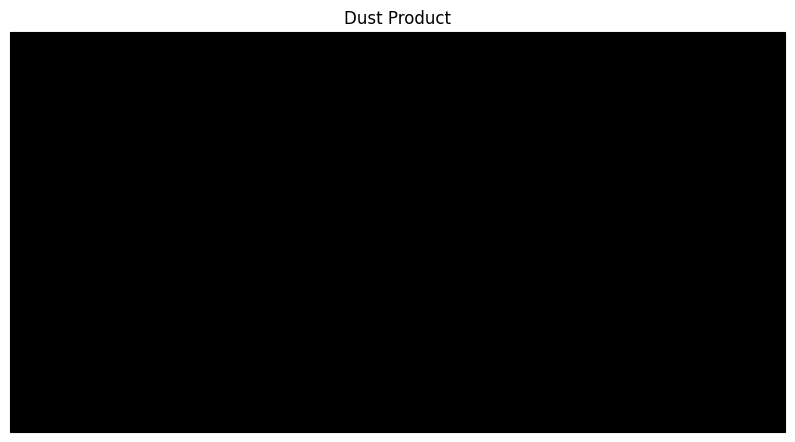

In [33]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import satpy
from satpy.scene import Scene
import matplotlib.pyplot as plt
import os
import numpy as np

CHANNEL_NAMES = {1: "VIS006",
                 2: "VIS008",
                 3: "IR_016",
                 4: "IR_039",
                 5: "WV_062",
                 6: "WV_073",
                 7: "IR_087",
                 8: "IR_097",
                 9: "IR_108",
                 10: "IR_120",
                 11: "IR_134",
                 12: "HRV"}

def arr_filled(arr, value):
    for i in range(len(arr)):
        arr[i] = value
    return arr

def rescale(arr, imin, imax, omin, omax, out=None):
    """
    Rescale values of the array from [imin, imax] to [omin, omax], clipping
    outliers to omin or omax
    """
    # Fill masked data with the minimum sample value
    arr = arr_filled(arr, imin)

    if imin <= imax:
        res = np.clip(arr, imin, imax, out)
        res -= imin
        res = np.multiply(res, float(omax-omin) / float(imax-imin), casting="unsafe")
        res += omin
    else:
        res = np.clip(arr, imax, imin, out)
        res -= imin
        res = np.multiply(res, -(float(omax-omin) / float(imin-imax)), casting="unsafe")
        res += omin
    return res

def generate_dust_product(data_dir, latBound, lngBound):
    # List all files in the directory
    files = os.listdir(data_dir)
    fnames = [os.path.join(data_dir, f) for f in files]

    # Create a Scene object
    scn = Scene(reader='seviri_l1b_hrit', filenames=fnames)

    # Load necessary channels
    scn.load(["IR_087", "IR_108", "IR_120"])

    # Access product data
    ir087 = scn["IR_087"]
    ir108 = scn["IR_108"]
    ir120 = scn["IR_120"]

    # Create an instance of the Dust product
    dust_r = rescale(ir120 - ir108,  -4,   2, 0, 255)
    dust_g = (rescale(ir108 - ir087,  0,  15, 0, 1) ** (1/2.5)) * 255
    dust_b = rescale(ir108,         261, 289, 0, 255)

    # Create a plot with Cartopy
    plt.figure(figsize=(10, 8))

    # Define the projection
    proj = ccrs.PlateCarree()  # Assuming data is in PlateCarree projection
    ax = plt.axes(projection=proj)
    ax.set_extent([lngBound[0], lngBound[1], latBound[0], latBound[1]], crs=ccrs.PlateCarree())

    # Plot the data
    plt.imshow(np.dstack((dust_r, dust_g, dust_b)), extent=(lngBound[0], lngBound[1], latBound[0], latBound[1]), transform=ccrs.PlateCarree())

    # Add coastlines
    ax.coastlines()

    # Add title
    plt.title("Dust Product")

    plt.show()

# Replace with your actual directory and filename pattern (assuming no extensions)
data_dir = "drive/MyDrive/RAW_HRIT/14-00"

latBound = [7.22, 37.454]
lngBound = [43.753, 102.363]

# Generate the Dust product
generate_dust_product(data_dir, latBound, lngBound)


In [ ]:
import numpy as np

def rescale(data, in_min, in_max, out_min, out_max):
    return (data - in_min) * (out_max - out_min) / (in_max - in_min) + out_min

def generate_dust_rgb(scn):
    ir120 = scn["IR_120"].data
    ir108 = scn["IR_108"].data
    ir087 = scn["IR_087"].data

    r = rescale(ir120 - ir108, -4, 2, 0, 255)
    g = (np.power(rescale(ir108 - ir087, 0, 15, 0, 1), 1/2.5)) * 255
    b = rescale(ir108, 261, 289, 0, 255)
    
    return r, g, b

def generate_dust_rgb_product(data_dir, latBound, lngBound):
    # Define the channels needed for RGB computation
    channels = ["IR_120", "IR_108", "IR_087"]

    # List all files in the directory
    files = os.listdir(data_dir)
    fnames = [os.path.join(data_dir, f) for f in files]

    # Create a Scene object
    scn = Scene(reader='seviri_l1b_hrit', filenames=fnames)

    scn.load(channels)

    # Compute RGB values
    r, g, b = generate_dust_rgb(scn)
    # Combine RGB channels
    rgb_image = np.dstack((r, g, b))
    proj = scn["IR_120"].attrs['area'].to_cartopy_crs()
    transformProj = ccrs.Mercator()

    # Create a plot with Cartopy
    plt.figure(figsize=(10, 8))

    # Define the projection and extent
    ax = plt.axes(projection=ccrs.Mercator())
    ax.set_extent([lngBound[0], lngBound[1], latBound[0], latBound[1]], crs=ccrs.PlateCarree())

    # Plot the RGB image
    plt.imshow(rgb_image, extent=proj.bounds, transform=proj, origin='upper')

    # Add map features
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.5)
    ax.add_feature(cfeature.BORDERS.with_scale('50m'), linewidth=0.5)

    # Add title
    plt.title("Dust RGB Product")

    plt.show()

# Replace with your actual directory and filename pattern (assuming no extensions)
data_dir = "drive/MyDrive/RAW_HRIT/14-00"

latBound = [7.22, 37.454]
lngBound = [43.753, 102.363]

# Generate dust RGB product
generate_dust_rgb_product(data_dir, latBound, lngBound)


In [ ]:
import numpy as np

def rescale(data, in_min, in_max, out_min, out_max):
    return (data - in_min) * (out_max - out_min) / (in_max - in_min) + out_min

def volcanic_ash_rgb(scn):
    channels = ["IR_120", "IR_108", "IR_087"]
    scn.load(channels)
    ir120 = scn["IR_120"].data
    ir108 = scn["IR_108"].data
    ir087 = scn["IR_087"].data

    r = rescale(ir120 - ir108, -4, 2, 0, 255)
    g = rescale(ir108 - ir087, -4, 5, 0, 255)
    b = rescale(ir108, 243, 303, 0, 255)

    # Combine RGB channels
    rgb_image = np.dstack((r, g, b))
    return rgb_image
        
def generate_dust_rgb(scn):
    channels = ["IR_120", "IR_108", "IR_087"]
    scn.load(channels)
    ir120 = scn["IR_120"].data
    ir108 = scn["IR_108"].data
    ir087 = scn["IR_087"].data

    r = rescale(ir120 - ir108, -4, 2, 0, 255)
    g = (np.power(rescale(ir108 - ir087, 0, 15, 0, 1), 1/2.5)) * 255
    b = rescale(ir108, 261, 289, 0, 255)
    # Combine RGB channels
    rgb_image = np.dstack((r, g, b))
    return "Dust RGB Product",rgb_image

def generate_product(productGenerateFn ,data_dir, latBound, lngBound):
    # List all files in the directory
    files = os.listdir(data_dir)
    fnames = [os.path.join(data_dir, f) for f in files]

    # Create a Scene object
    scn = Scene(reader='seviri_l1b_hrit', filenames=fnames)

    # Compute RGB values
    productTitle, rgbImage = productGenerateFn(scn)

    proj = scn["IR_120"].attrs['area'].to_cartopy_crs()
    transformProj = ccrs.Mercator()

    # Create a plot with Cartopy
    plt.figure(figsize=(10, 8))

    # Define the projection and extent
    ax = plt.axes(projection=ccrs.Mercator())
    ax.set_extent([lngBound[0], lngBound[1], latBound[0], latBound[1]], crs=ccrs.PlateCarree())

    # Plot the RGB image
    plt.imshow(rgbImage, extent=proj.bounds, transform=proj, origin='upper')

    # Add map features
    ax.add_feature(cfeature.COASTLINE.with_scale('50m'), linewidth=0.5)
    ax.add_feature(cfeature.BORDERS.with_scale('50m'), linewidth=0.5)

    # Add title
    plt.title(productTitle)

    plt.show()

# Replace with your actual directory and filename pattern (assuming no extensions)
data_dir = "drive/MyDrive/RAW_HRIT/14-00"

latBound = [7.22, 37.454]
lngBound = [43.753, 102.363]

# Generate dust RGB product
generate_product(generate_dust_rgb, data_dir, latBound, lngBound)
